### Exercise 1

Можно доказать, что $g(n, m) = g(n-1,m) + g(n, m-1)$, где $g(n,m)$ - число выравниванией строк длиной n, m соответственно

Тогда из этой формулы, мы можем получить, что $g(n,m) = C^{m}_{n+m} = C^{n}_{n+m}$

Ниже приведено доказательство:

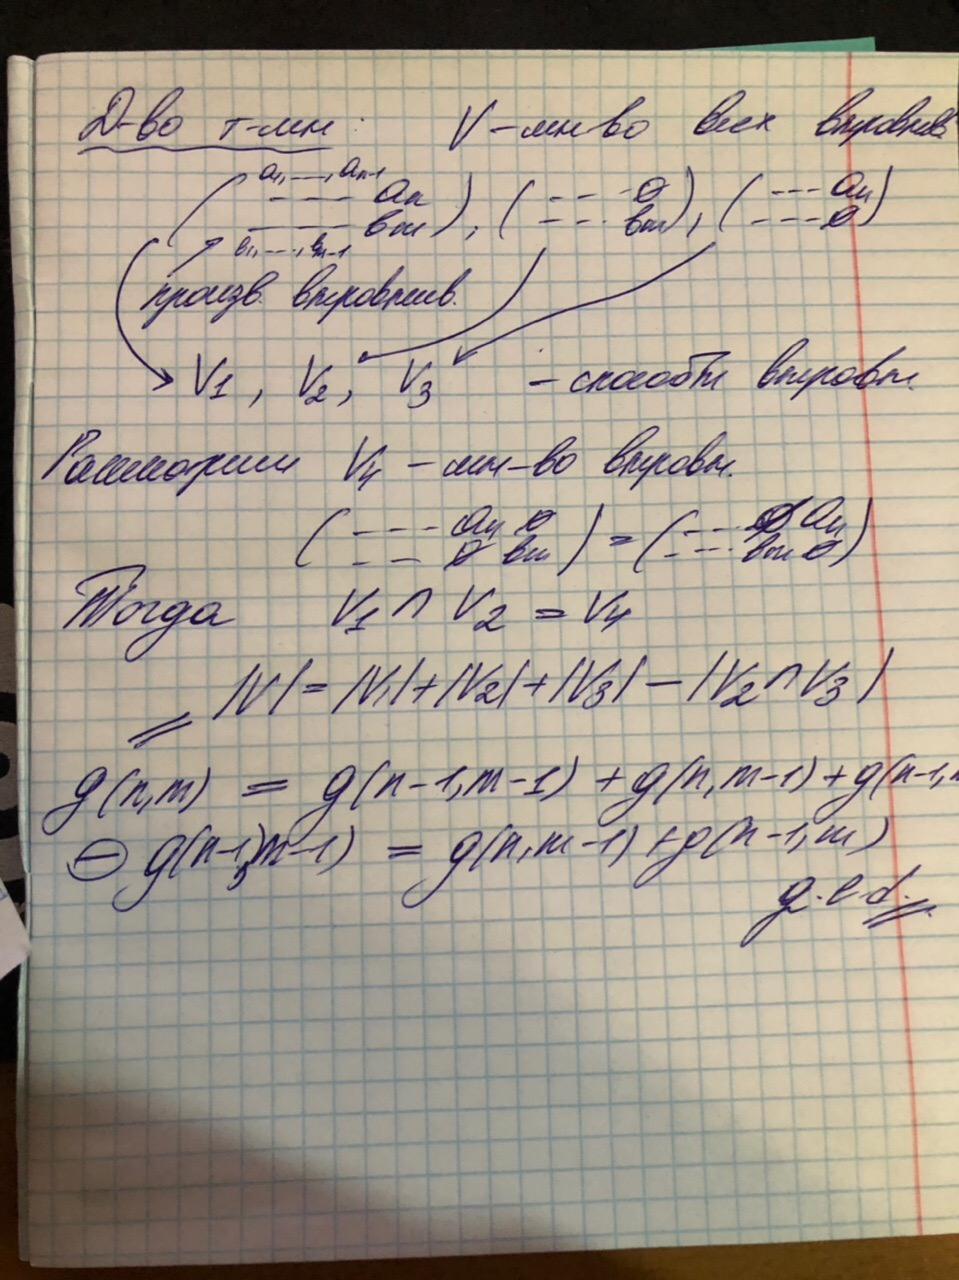

In [1]:
from IPython.display import Image
Image("123.jpg")

### Exercise 2

In [1]:
import numpy as np
import scipy as sc

In [2]:
def match(a,b, mu):
    if a == b:
        return 1
    else:
        return mu

In [3]:
def noodle(str1, str2, mu, gap, match:callable):
    #Computing matrix
    str1 = str1.upper()
    str2 = str2.upper()
    l1 = len(str1)
    l2 = len(str2)
    matrix = np.zeros((l1+1, l2+1))
    #k=1
    
    for i in range(1, l1+1):
        matrix[i][0] = gap*i
    
    for i in range(1, l2+1):
        matrix[0][i] = gap*i
    
    for i in range(1, l2+1):
        for j in range(1, l1+1):
            F_1 = matrix[j-1][i-1] + match(str1[j-1], str2[i-1], mu)
            F_2 = matrix[j-1][i] + gap
            F_3 = matrix[j][i-1] + gap
            matrix[j, i] = max(F_1, F_2, F_3)
    #As matrix computed, we reach returning point
    algn1 = ''
    algn2 = ''
    a = l1
    b = l2
    while not(a == 0 and b == 0):
        if matrix[a][b] == matrix[a-1][b-1] + match(str1[a-1], str2[b-1], mu):
            algn1 += str1[a-1]
            algn2 += str2[b-1]
            a = a-1
            b = b-1
        elif matrix[a][b] == matrix[a-1][b] + gap:
            algn1 += str1[a-1]
            algn2 += '-'
            a = a-1
        else:
            algn1 += '-'
            algn2 += str2[b-1]
            b = b-1
        '''max_res = max(matrix[a-1][b-1], matrix[a][b-1], matrix[a-1][b])
        if max_res == matrix[a-1][b-1]:
            algn1 += str1[a-1]
            algn2 += str2[b-1]
            a = a-1
            b = b-1
        elif max_res == matrix[a-1][b]:
            algn1 += str1[a-1]
            algn2 += '-'
            a = a-1
        else:
            algn1 += '-'
            algn2 += str2[b-1]
            b = b-1'''
    if a>0:
        while a != 0:
            algn1 += str1[a-1]
            algn2 += '-'
            a = a-1
    if b>0:
        while b != 0:
            algn1 += '-'
            algn2 += str2[b-1]
            b = b-1
    print(a, b) #для проверки
    algn1 = algn1[::-1]
    algn2 = algn2[::-1]
    return algn1, algn2, matrix

In [4]:
#Запустил с gap = -0.4, чтобы были видны различия
a1, a2, matrix = noodle('SSTRARSS', 'HASMDTRARKKSS', -1, -0.3, match)
print(a1)
print(a2)

0 0
--SS--TRAR--SS
HA-SMDTRARKKSS


In [5]:
#Запустил с gap = -0.7, чтобы были видны различия
a1, a2, matrix = noodle('SSTRARSS', 'HASMDTRARKKSS', -1, -1, match)
print(a1)
print(a2)

0 0
--S-STRAR--SS
HASMDTRARKKSS


In [137]:
a1, a2, matrix = noodle('SSTRARSS', 'SAHHMARM', -1, -5, match)
print(a1)
print(a2)


0 0
SSTRARSS
SAHHMARM


In [138]:
a1, a2, matrix = noodle('SSTRARSS', 'SAHHMARM', -1, -0.5, match)
print(a1)
print(a2)

0 0
S-STRARSS
SAHHMAR-M


In [9]:
a1, a2, matrix = noodle('ATGCATGCCGG', 'TCCGAAAC', -1, -0.2, match)
print(a1)
print(a2)

0 0
AT--G--CATGCCGG
-TCCGAA-A---C--


#### Exercise 3: Needleman-Wunsh with weight matrix

In [18]:
def match_boosted(A, alphabet, a, b):
    index1 = alphabet.find(a)
    index2 = alphabet.find(b)
    return A[index1, index2]

In [96]:
#TODO: с таблицей и чуть костылей
def noodle_boosted(str1, str2, A, alphabet, match_boosted:callable):
    #Computing matrix
    str1 = str1.upper()
    str2 = str2.upper()
    l1 = len(str1)
    l2 = len(str2)
    matrix = np.zeros((l1+1, l2+1))
    for i in range(1, l1+1):
        matrix[i][0] = match_boosted(A, alphabet, '-', '-')*i
    for i in range(1, l2+1):
        matrix[0][i] = match_boosted(A, alphabet, '-', '-')*i
    for i in range(1, l2+1):
        for j in range(1, l1+1):
            F_1 = matrix[j-1][i-1] + match_boosted(A, alphabet, str1[j-1], str2[i-1])
            F_2 = matrix[j-1][i] + match_boosted(A, alphabet, str1[j-1], '-')
            F_3 = matrix[j][i-1] + match_boosted(A, alphabet, str2[i-1], '-')
            matrix[j, i] = max(F_1, F_2, F_3)
    #As matrix computed, we reach returning point
    algn1 = ''
    algn2 = ''
    a = l1
    b = l2
    while not(a == 0 or b == 0):
        if matrix[a][b] == matrix[a-1][b-1] + match_boosted(A, alphabet, str1[a-1], str2[b-1]):
            algn1 += str1[a-1]
            algn2 += str2[b-1]
            a = a-1
            b = b-1
        elif matrix[a][b] == matrix[a-1][b] + match_boosted(A, alphabet, str1[a-1], '-'):
            algn1 += str1[a-1]
            algn2 += '-'
            a = a-1
        else:
            algn1 += '-'
            algn2 += str2[b-1]
            b = b-1
        '''max_res = max(matrix[a-1][b-1], matrix[a][b-1], matrix[a-1][b])
        if max_res == matrix[a-1][b-1]:
            algn1 += str1[a-1]
            algn2 += str2[b-1]
            a = a-1
            b = b-1
        elif max_res == matrix[a-1][b]:
            algn1 += str1[a-1]
            algn2 += '-'
            a = a-1
        else:
            algn1 += '-'
            algn2 += str2[b-1]
            b = b-1
    if a == 0:
        if b!=0:
            for i in range(b):
                algn1 += '-'
                algn2 += str2[i]
    else:
        for i in range(a):
            algn2 += '-'
            algn1 += str1[i]'''
    if a>0:
        while a != 0:
            algn1 += str1[a-1]
            algn2 += '-'
            a = a-1
    if b>0:
        while b != 0:
            algn1 += '-'
            algn2 += str2[b-1]
            b = b-1
    print(a, b) #для проверки
    algn1 = algn1[::-1]
    algn2 = algn2[::-1]
    return algn1, algn2, matrix

In [143]:
# making alphabet and matrix
alphabet = '-ABC'
A=np.zeros((4,4))

# A - weight-matrix!
A[0][0] = -1; A[1][1] = np.random.uniform(-2, 2); A[2][2] = np.random.uniform(-2, 2); A[3][3] = np.random.uniform(-2, 2)

for i in range(1, 4):
    A[0][i] = np.random.uniform(-2,0)

A[1][2] = np.random.uniform(-2, 2); A[1,3] = np.random.uniform(-2, 2); A[2][3] = np.random.uniform(-2, 2)

#symmetrizing matrix A
for j in range(4):
    for i in range(4):
        #print(A[j][i])
        if abs(A[j][i]) > 0:
            A[i][j] = A[j][i]
A # = weight matrix

array([[-1.        , -1.9498005 , -1.72225362, -0.11290831],
       [-1.9498005 ,  1.57546475,  1.14462038,  0.75959424],
       [-1.72225362,  1.14462038,  0.5978595 , -1.38453669],
       [-0.11290831,  0.75959424, -1.38453669, -1.82055065]])

In [144]:
match_boosted(A, alphabet, 'A', '-')

-1.9498004988309174

In [145]:
#проверяем с рандомной матрицей весов
a1, a2, matrix = noodle_boosted('CCAABCBCCACAB', 'сBAAAсBBсBс', A, alphabet, match_boosted)
print(a1)
print(a2)
matrix

0 0
-CCAABC-BCCACAB-
С--BAAAСB--B-СBС


array([[  0.        ,  -1.        ,  -2.        ,  -3.        ,
         -4.        ,  -5.        ,  -6.        ,  -7.        ,
         -8.        ,  -9.        , -10.        , -11.        ],
       [ -1.        ,  -1.11290831,  -2.11290831,  -1.24040576,
         -2.24040576,  -3.24040576,  -3.35331406,  -5.07556768,
         -6.7978213 ,  -6.91072961,  -8.63298323,  -8.74589154],
       [ -2.        ,  -1.22581661,  -2.22581661,  -1.35331406,
         -0.48081151,  -1.48081151,  -1.59371982,  -3.31597344,
         -5.03822706,  -5.15113536,  -6.87338898,  -6.98629729],
       [ -3.        ,  -1.24040576,  -0.08119624,  -0.65035187,
          0.22215068,   1.09465323,   0.98174493,  -0.44909944,
         -2.17135306,  -2.28426137,  -4.00651499,  -4.1194233 ],
       [ -4.        ,  -2.24040576,  -0.09578538,   1.49426851,
          0.92511288,   1.79761543,   1.85424748,   2.1263653 ,
          0.69552093,   0.58261262,  -1.139641  ,  -1.2525493 ],
       [ -5.        ,  -3.96265937,